In [97]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import pickle
%matplotlib inline

The type of this input is <class 'numpy.ndarray'>.
Shape: (197, 61, 3)


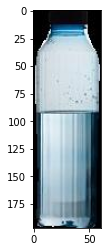

In [70]:
image = cv2.imread('./pics/auto_seg/blue0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(f'The type of this input is {type(image)}.')
print(f'Shape: {image.shape}')
plt.imshow(image)

In [56]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [57]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [82]:
def color_detect(image, clf, labels):
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    
    fig = plt.figure(figsize = (16, 6))
    fig.add_subplot(1,2,1)
    plt.axis('off')
    plt.imshow(image)
    fig.add_subplot(1,2,2)
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        

    return rgb_colors, fig

In [108]:
def process_image(image,region_offset):
    
    image = np.array(cv2.resize(image, (100,120), interpolation=cv2.INTER_AREA))[20:]
    center = [image.shape[0]//2, image.shape[1]//2]
    image = image[center[0] - region_offset : center[0] + region_offset, center[1] - region_offset : center[1] + region_offset]
    #modified_image = cv2.resize(image, (100, 100), interpolation = cv2.INTER_AREA)
    #print(f'Image resized to {modified_image.shape}')
    image_flat = image.reshape(image.shape[0]*image.shape[1], 3)
    #print(f'Flattened shape: {modified_image_flat.shape}')
    
    return image,image_flat

In [109]:
def pipeline(impath,out_path,region_offset):
    
    image = get_image(impath)
    modified_image, modified_image_flat = process_image(image,region_offset=region_offset)
    
    clf = KMeans(n_clusters = 5)
    labels = clf.fit_predict(modified_image_flat)
    rgb_colors, fig = color_detect(modified_image, clf, labels)
    plt.savefig(out_path)
    #plt.show()
    
    return rgb_colors

[array([ 74.61304348, 109.69347826, 125.58043478]),
 array([205.40347072, 221.82832352, 229.71056709]),
 array([121.7893681 , 155.38615848, 171.17552658]),
 array([16.90566038, 42.38274933, 56.83018868]),
 array([164.95836431, 191.65799257, 204.77918216])]

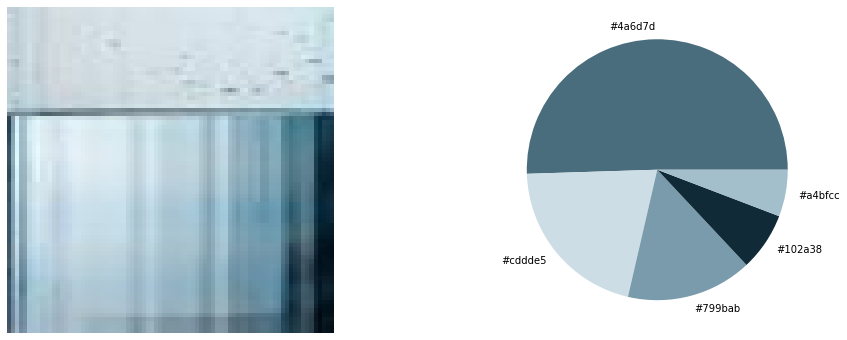

In [110]:
impath = './pics/auto_seg/blue0.jpg'
out_path = 'out.jpg'
region_offset=40
pipeline(impath=impath, out_path=out_path, region_offset=region_offset)

In [113]:
def process_batch(data_path):
    
    clustered_values = {}
    with os.scandir(data_path) as labels:
        
            for label in labels:

                if os.path.isdir(label):
                    item_path = data_path + label.name + '/'
                    rgb = []

                    with os.scandir(item_path) as items:

                        for item in items:
                            
                            impath = f'{item_path}{item.name}'
                            out_path = f'./pie_charts/{item.name}'
                            rgb_colors = pipeline(impath=impath, out_path=out_path, region_offset=30)
                            rgb.append(rgb_colors)

                    clustered_values[label.name] = rgb

    f = open('clustered.pkl','wb')
    pickle.dump(clustered_values, f)
    f.close()

<ipython-input-82-7053798df16a>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (16, 6))


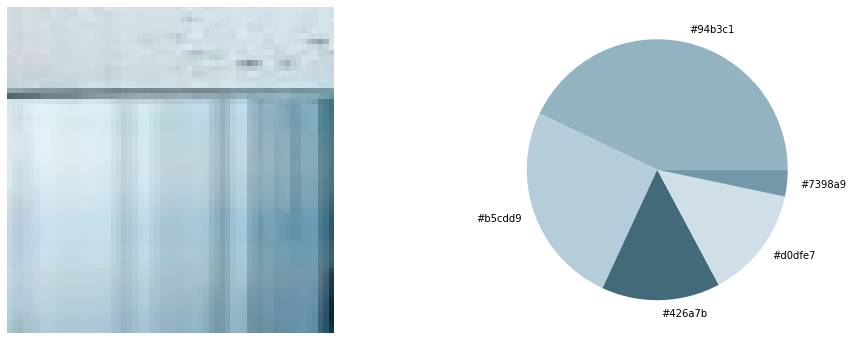

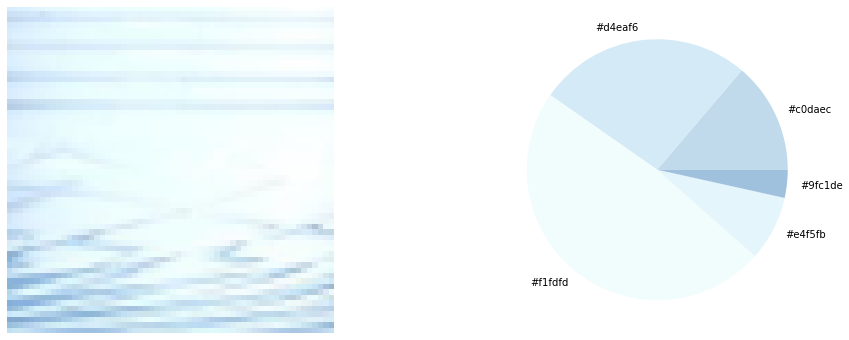

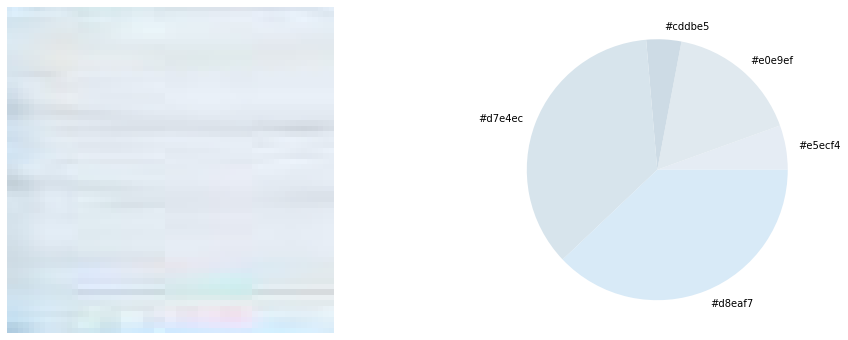

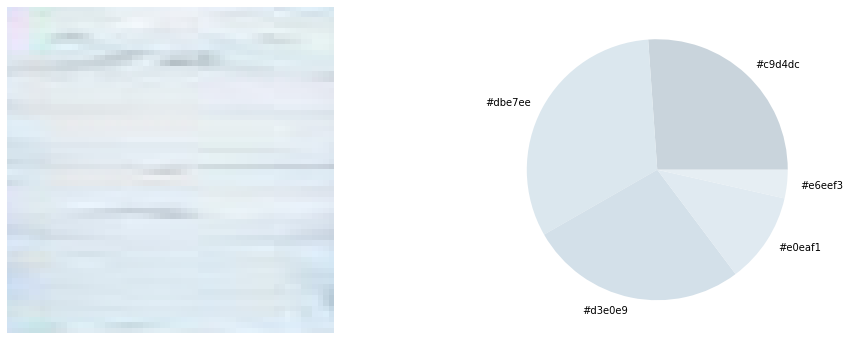

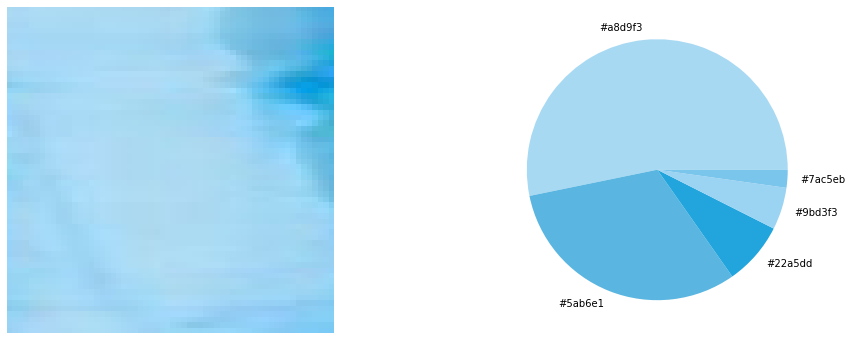

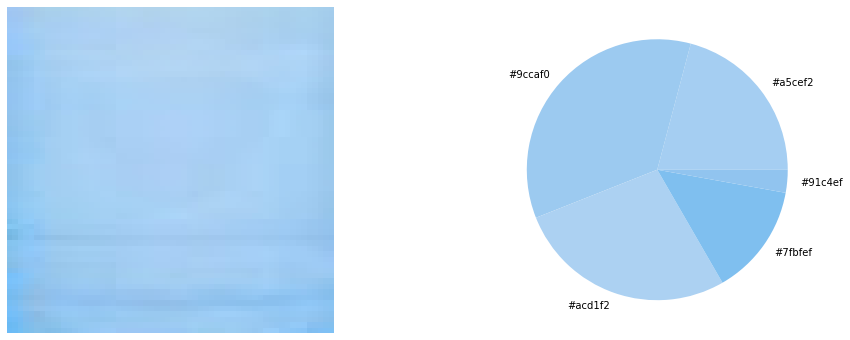

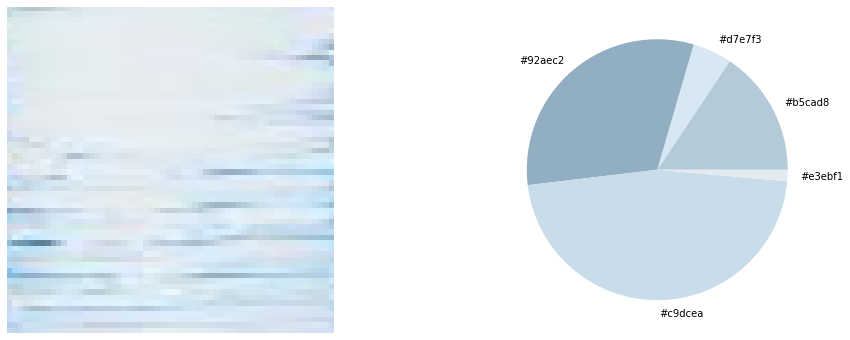

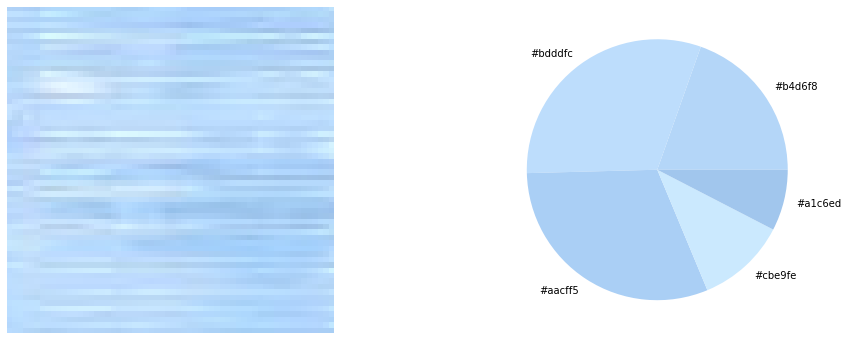

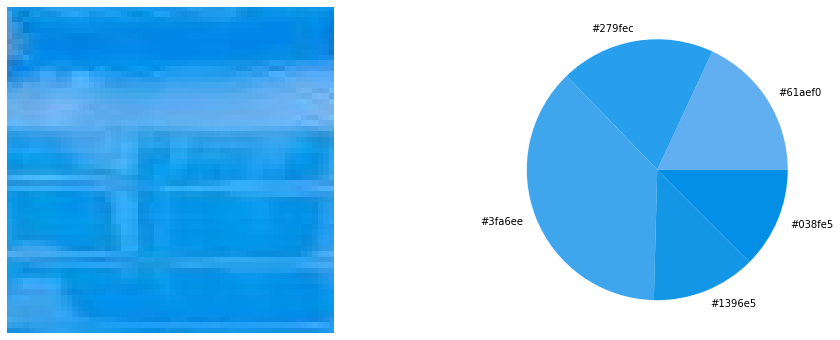

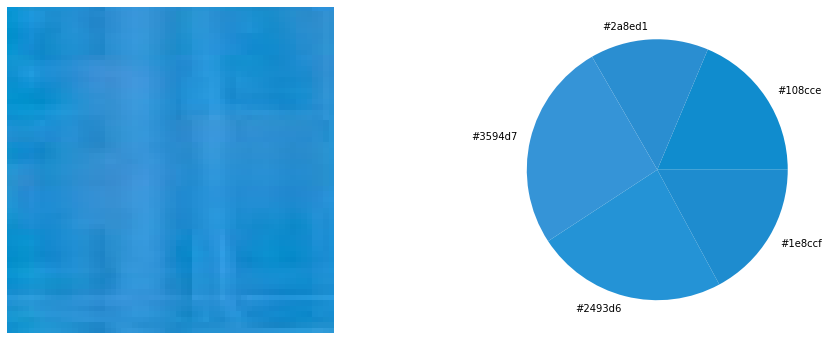

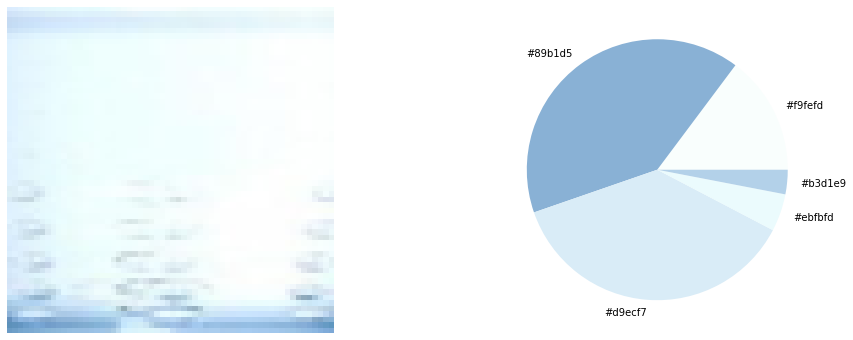

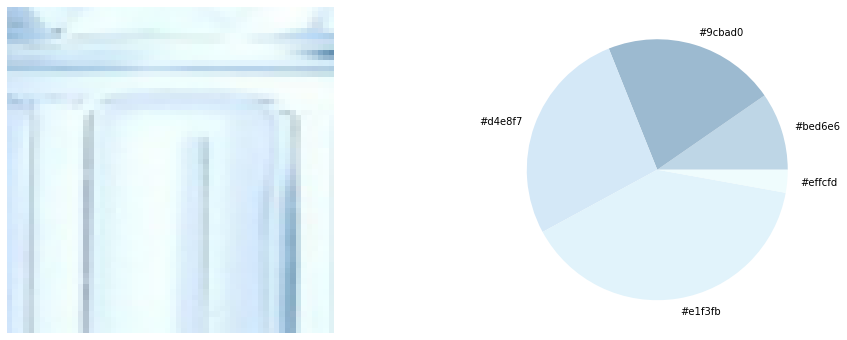

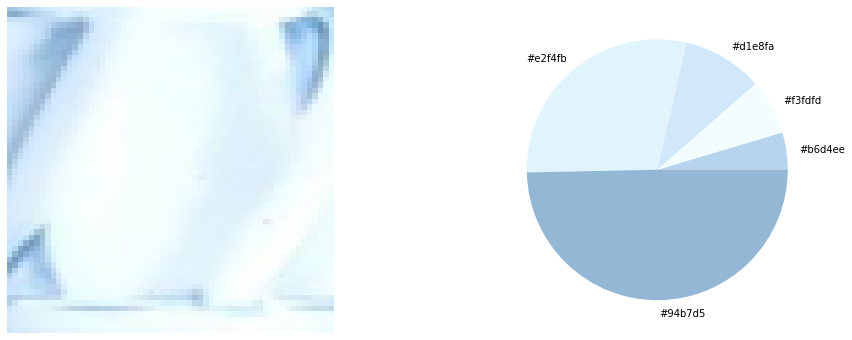

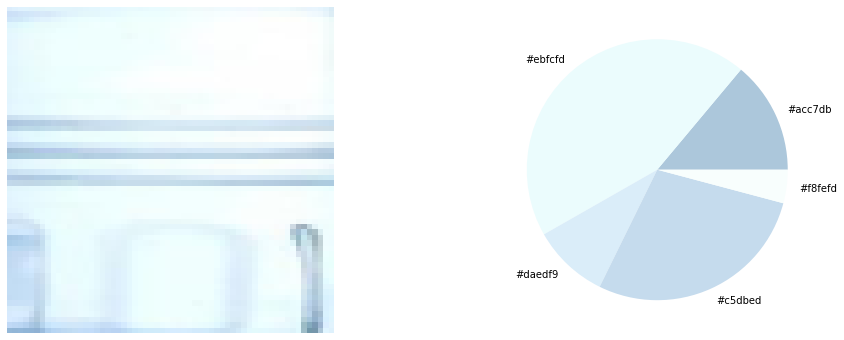

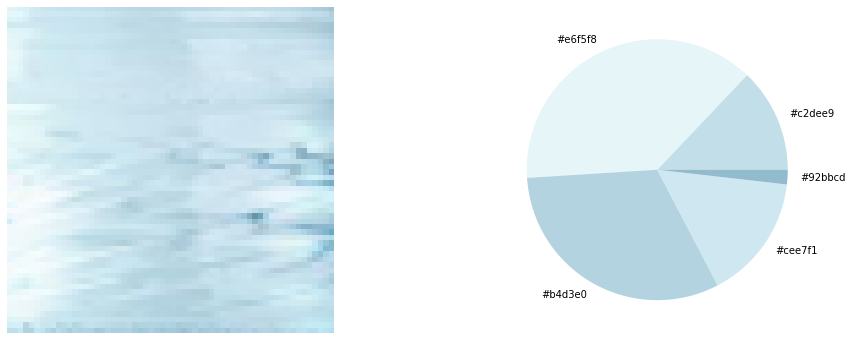

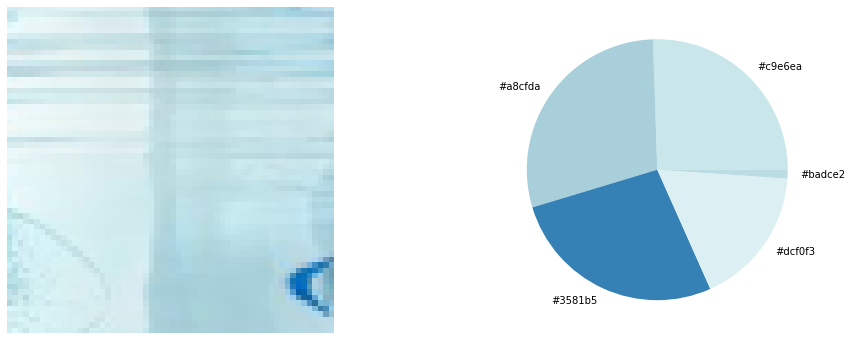

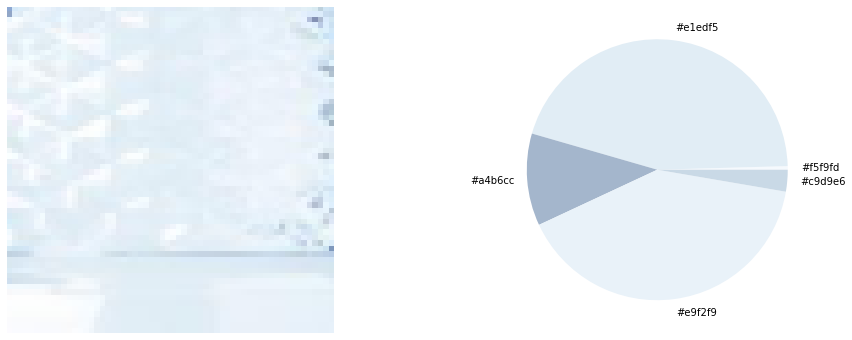

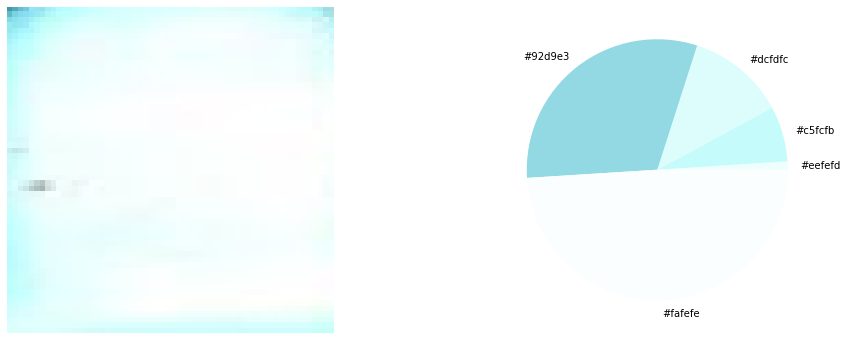

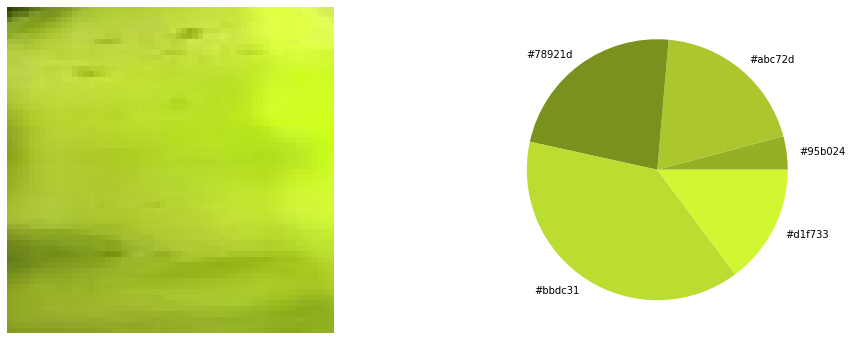

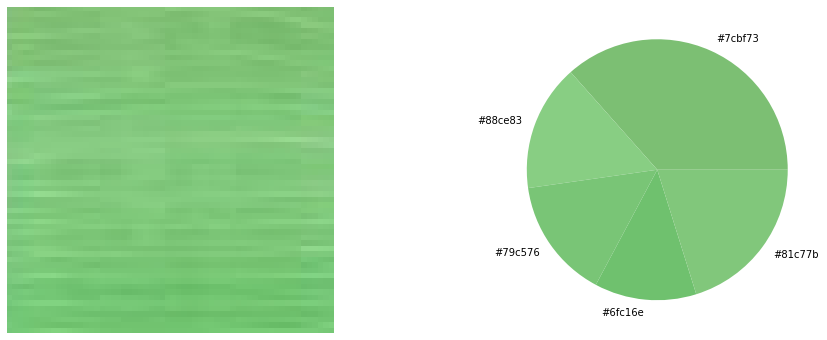

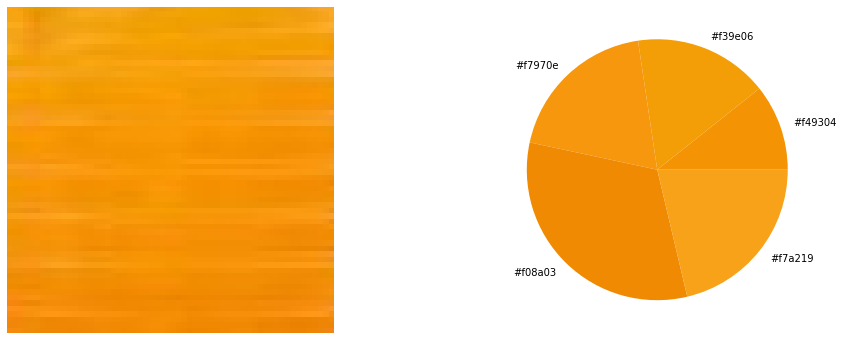

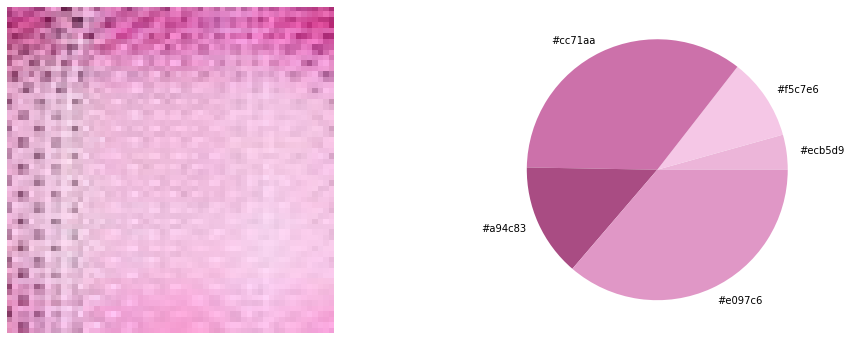

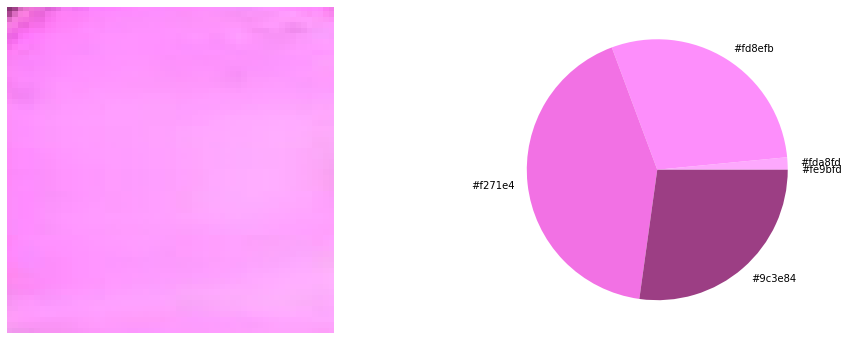

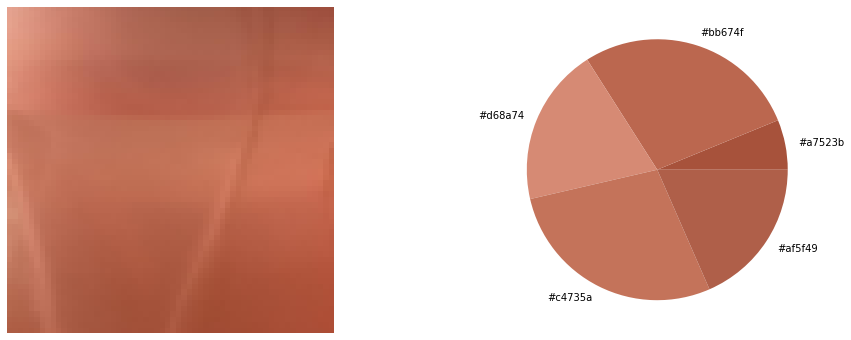

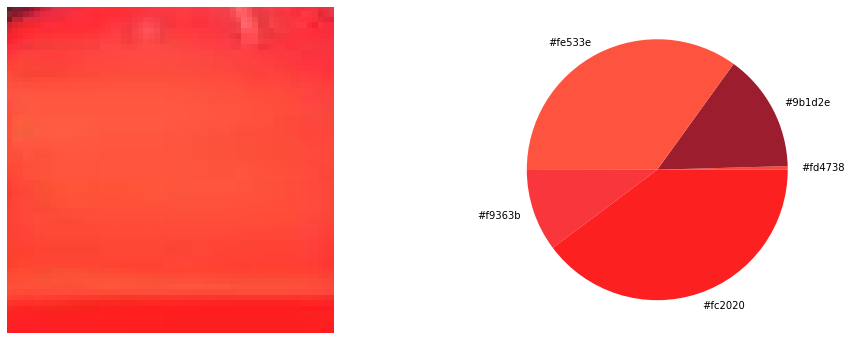

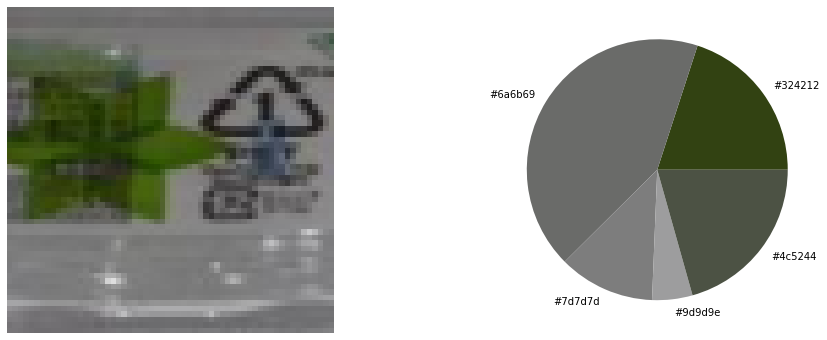

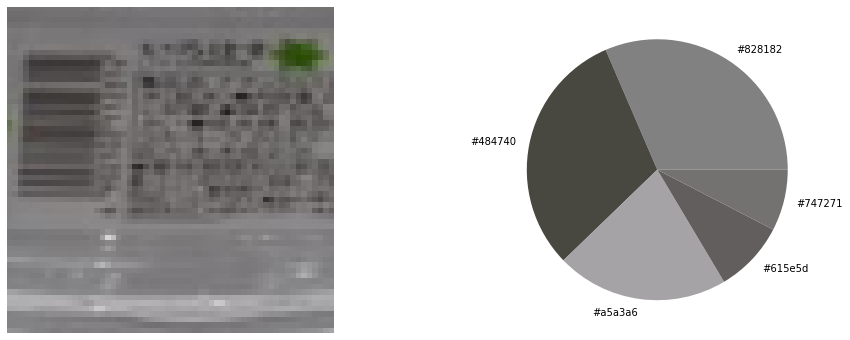

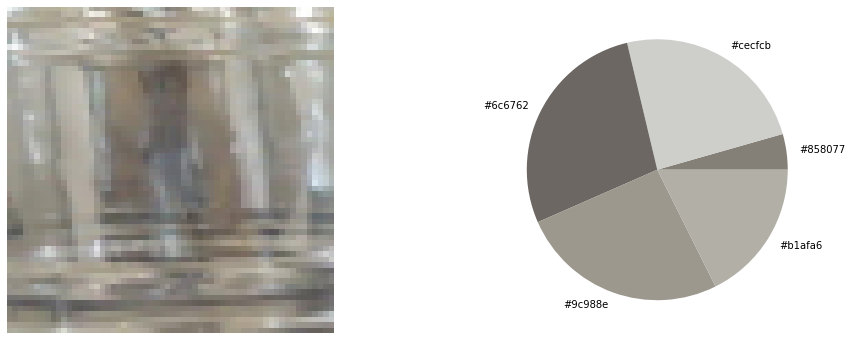

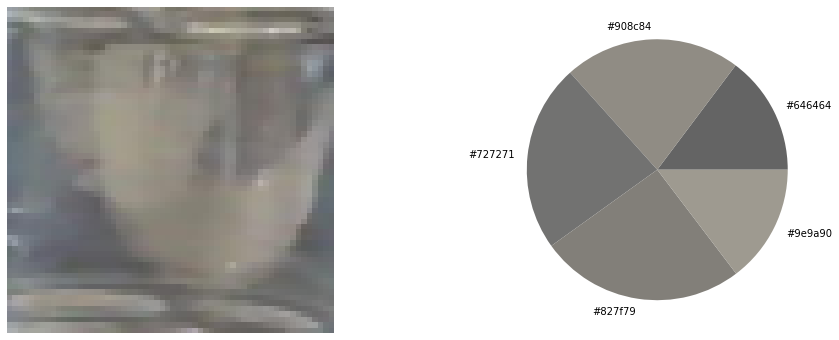

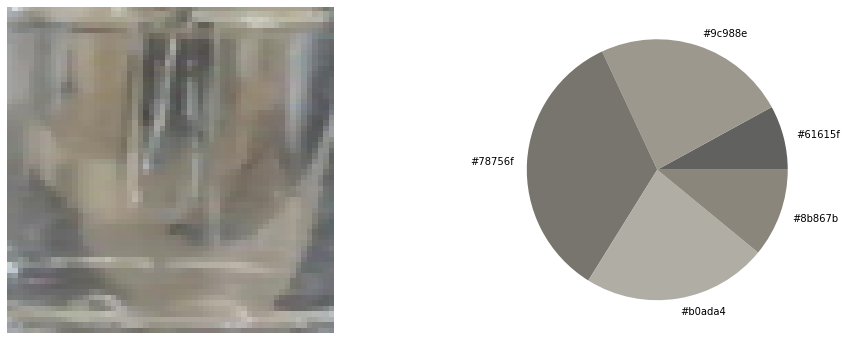

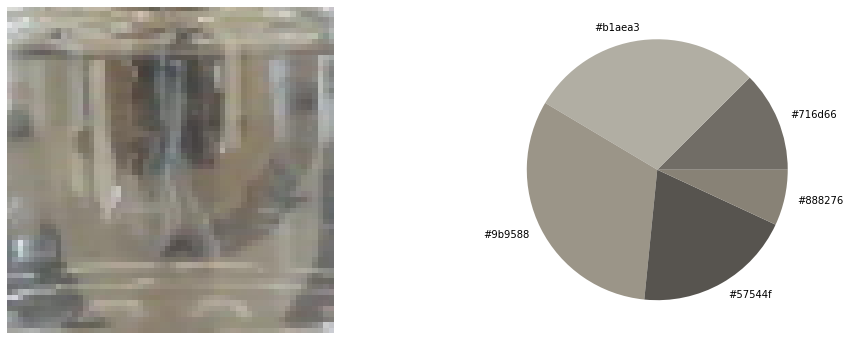

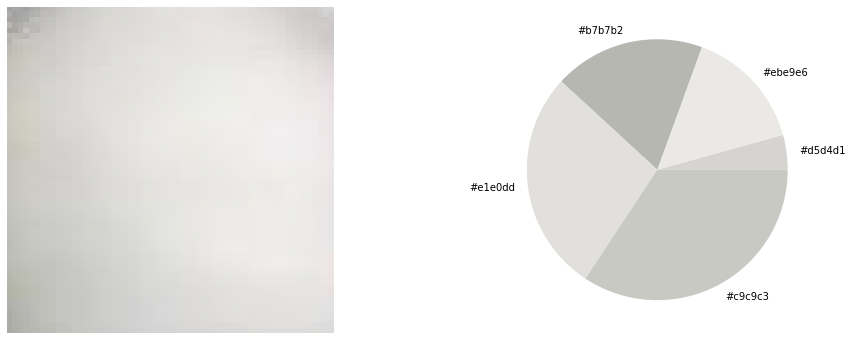

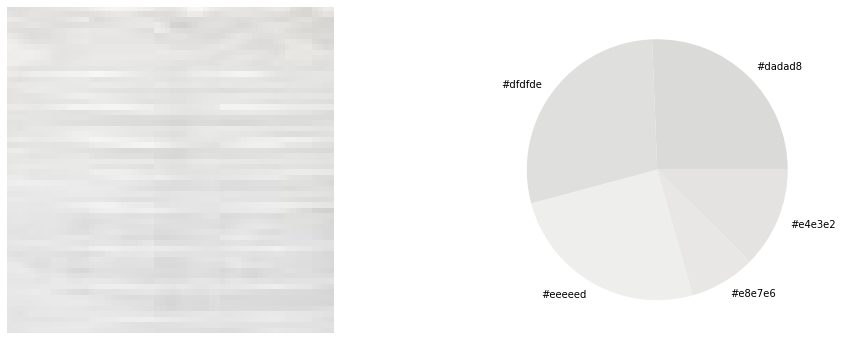

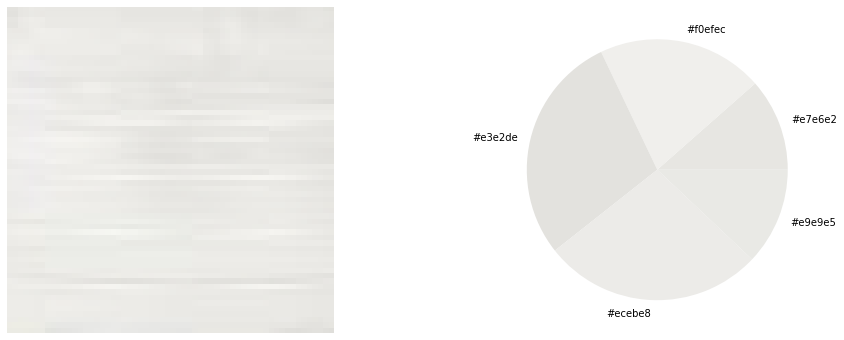

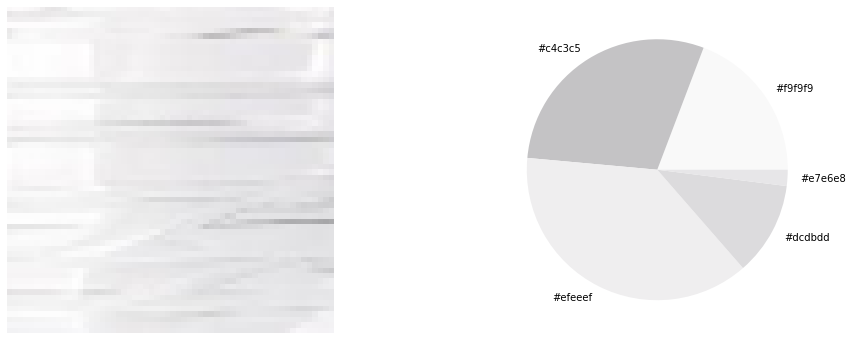

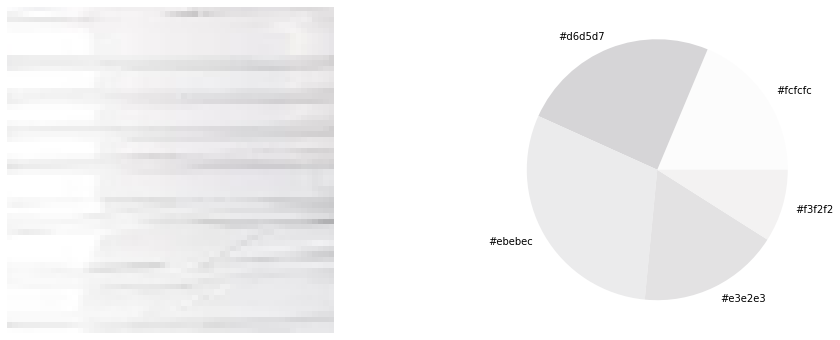

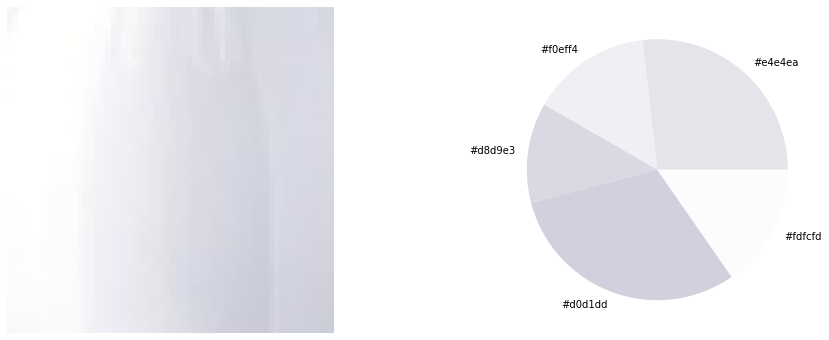

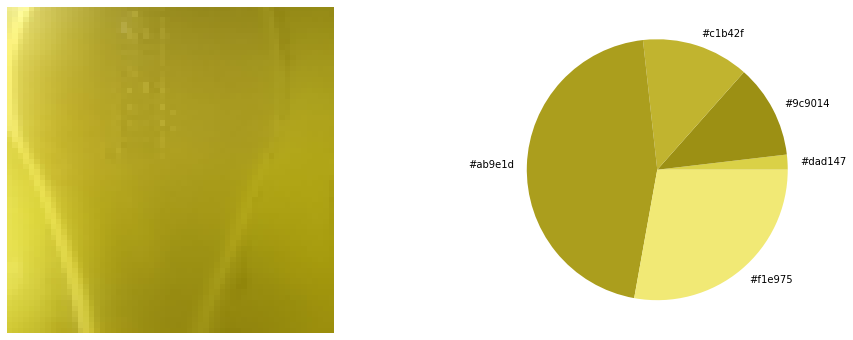

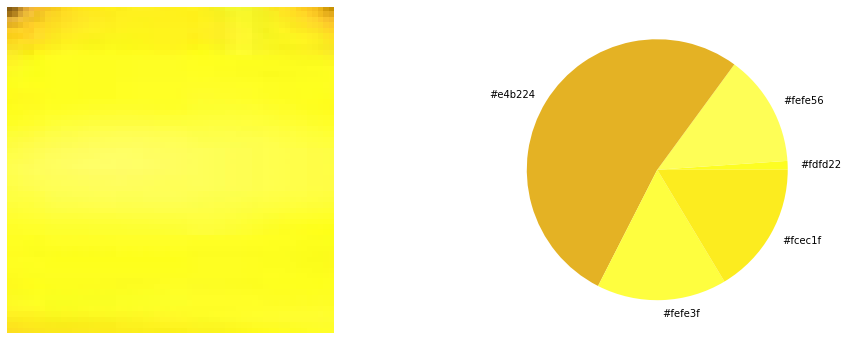

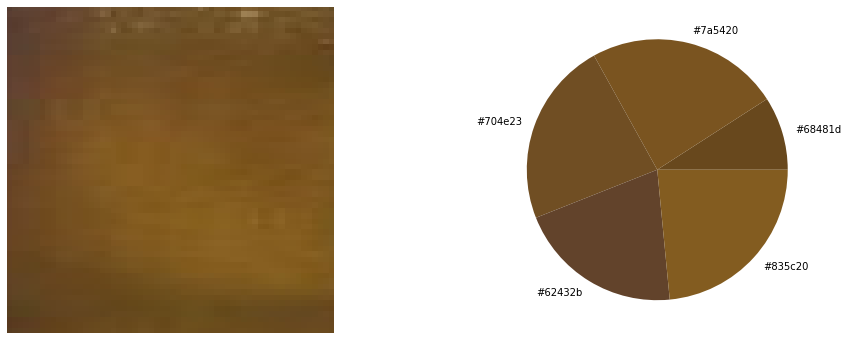

In [114]:
data_path = './pics/data/'
process_batch(data_path=data_path)